<a href="https://colab.research.google.com/github/Angelaruiga/python_/blob/main/Publicaciones_Grupos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Importación Librerías

In [ ]:
import pandas as pd
import numpy as np
import io

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install plotly

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
%matplotlib inline

[Ejemplos Graficos matplotlib](https://matplotlib.org/stable/plot_types/index.html)


[Ejemplos Gráficos seabonr](https://seaborn.pydata.org/examples/index.html/)


[Ejemplos Gráficos ploty](https://plotly.com/python//)

In [ ]:
import datetime
import warnings
warnings.filterwarnings('ignore')

# 2.Lectura csv en drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Publicaciones 2023](https://drive.google.com/drive/u/0/folders/1ZG2tocckv6U4ZOPfKKfmf_XM0g3AeMYA)

In [ ]:
# Detectando nans desde el comienzo
# na_filter -> muestra valores nulos
# keep_default_na -> interpreta todas las cadenas de caracteres 'NaN', 'NULL', 'N/A', etc. como nulos

publicaciones__grupos = pd.read_csv('/content/drive/MyDrive/Publicaciones_2023/Autores_Publicaciones2023_inibica.csv', na_filter = True, keep_default_na = True)

publicaciones__grupos_coemas = pd.read_csv('/content/drive/MyDrive/Publicaciones_2023/df_publicaciones2023COEMAS.csv', na_filter = True, keep_default_na = True)

publicaciones_autoria_colaborativa = pd.read_csv('/content/drive/MyDrive/Publicaciones_2023/df_publicaciones2023_con_group_authors.csv', na_filter = True, keep_default_na = True)


In [ ]:
publicaciones__grupos_coemas.columns

Index(['PERSONAL', 'ORCID', 'GRUPO', 'Authors', 'Title', 'Source title', 'DOI',
       'Document Type', 'Source', 'Encontrado', 'Encontrado_DOI',
       'Coincidencias'],
      dtype='object')

In [ ]:
# Seleccionar y ordenar las columnas deseadas
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas[['Title','Source title', 'PERSONAL', 'DOI', 'GRUPO']]

#Renombrar las columnas
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2.rename(columns={
    'Title': 'Article Title',
    'PERSONAL': 'Autores',
    'GRUPO':'Código Grupo',
    'Source title':'Journal name'
})

In [ ]:
# añadir al codigo una nueva columna para que indique cuales son Group Authors ,
# importar el JCR y ver que articulos de coemas están indexados o no en JCR

In [ ]:

#@title Subida archivo JCR

import pandas as pd

# Ajusta la ruta del archivo según corresponda
xlsx_file_path = '/content/drive/MyDrive/Publicaciones_2023/2023impactfactor-only.xlsx'
csv_file_path = xlsx_file_path.replace('.xlsx', '.csv')

# Cargar el archivo Excel
df = pd.read_excel(xlsx_file_path)

# Convertir a CSV
df.to_csv(csv_file_path, index=False)

# Ahora, leer el archivo CSV recién creado, con manejo de valores NaN
JCR_20230628 = pd.read_csv(csv_file_path, na_filter=True, keep_default_na=True)

print(f"Archivo convertido y guardado en: {csv_file_path}")


Archivo convertido y guardado en: /content/drive/MyDrive/Publicaciones_2023/2023impactfactor-only.csv


In [ ]:
print(JCR_20230628.index)

RangeIndex(start=0, stop=9485, step=1)


#3.Revisar la estructurar de los datasets

### Publicaciones colaborativas

In [ ]:
publicaciones_autoria_colaborativa.columns

Index(['Publication Type', 'Authors', 'Author Full Names', 'Group Authors',
       'Article Title', 'Source Title', 'Document Type', 'Author Keywords',
       'Keywords Plus', 'Abstract', 'Addresses', 'Affiliations',
       'Reprint Addresses', 'Email Addresses', 'Researcher Ids', 'ORCIDs',
       'Funding Orgs', 'Funding Name Preferred', 'Funding Text',
       'Cited References', 'Cited Reference Count', 'Times Cited, WoS Core',
       'Times Cited, All Databases', '180 Day Usage Count',
       'Since 2013 Usage Count', 'Publisher', 'Publisher City',
       'Publisher Address', 'ISSN', 'eISSN', 'ISBN', 'Journal Abbreviation',
       'Journal ISO Abbreviation', 'Publication Date', 'Publication Year',
       'Volume', 'Issue', 'Part Number', 'Supplement', 'Special Issue',
       'Meeting Abstract', 'Start Page', 'End Page', 'Article Number', 'DOI',
       'DOI Link', 'Book DOI', 'Early Access Date', 'Number of Pages',
       'WoS Categories', 'Web of Science Index', 'Research Areas',
  

In [ ]:

# Seleccionar solo las columnas deseadas
df_reducido_publicaciones_autoria_colaborativa = publicaciones_autoria_colaborativa[['Authors', 'Article Title','Group Authors', 'Source Title', 'Document Type', 'DOI']]
df_reducido_publicaciones_autoria_colaborativa

,Authors,Article Title,Group Authors,Source Title,Document Type,DOI
0,"Galli,F;Bindo,F;Motos,A;Fernandez-Barat,L;Barb...",Procalcitonin and C-reactive protein to rule o...,CIBERESUCICOVID Project Inves,INTENSIVE CARE MEDICINE,Article,10.1007/s00134-023-07161-1
1,"Little,K;Singh,A;Del Marco,A;Llorian-Salvador,...",Disruption of cortical cell type composition a...,RECOGNISED Consortium,DIABETOLOGIA,Article,10.1007/s00125-023-05935-2
2,"Velilla,TA;Guijarro,C;Ruiz,RC;Pinero,MR;Marcos...",Consensus document for lipid profile testing a...,Multidisciplinary Task Force,ADVANCES IN LABORATORY MEDICINE-AVANCES EN MED...,Article,10.1515/almed-2023-0047
3,"de Sequera,P;Perez-Garcia,R;Vega,A;Martinez-Va...",Trial design of the MOTheR HDx study: a multic...,MOTheR Collaborative Network,CLINICAL KIDNEY JOURNAL,Article; Early Access,10.1093/ckj/sfad128
4,"de Mendoza,C;Carrizo,P;Sauleda,S;Richart,A;Ran...",The slowdown of new infections by human retrov...,HTLV Spanish Network,JOURNAL OF MEDICAL VIROLOGY,Review,10.1002/jmv.28779
...,...,...,...,...,...,...
216,"Pokhilenko,I;Kast,T;Janssen,LMM;Evers,SMAA;Pau...",International comparability of reference unit ...,PECUNIA-Grp,EXPERT REVIEW OF PHARMACOECONOMICS & OUTCOMES ...,Article,10.1080/14737167.2023.2152331
217,"Sastre-Femenia,MA;Fernandez-Munoz,A;Gomis-Font...",Pseudomonas aeruginosa antibiotic susceptibili...,GEMARA-SEIMC CIBERINFEC,LANCET REGIONAL HEALTH-EUROPE,Article,10.1016/j.lanepe.2023.100736
218,"Filella,X;Gonzalez,A;Auge,JM;Barco,A;Carbonell...",A new perspective on prostate cancer screening,Comision Marcadores Biologicos Can; SEQCML,ADVANCES IN LABORATORY MEDICINE-AVANCES EN MED...,Article,10.1515/almed-2023-0034
219,"Louis,R;Harrison,TW;Chanez,P;Menzella,F;Philte...",Severe Asthma Standard-of-Care Background Medi...,ANDHI Study Investigators,JOURNAL OF ALLERGY AND CLINICAL IMMUNOLOGY-IN ...,Article,10.1016/j.jaip.2023.03.009


### Publicaciones_grupos

In [ ]:
# Verificar si los títulos
publicaciones__grupos['Encontrado'] = publicaciones__grupos['Article Title'].isin(publicaciones__grupos_coemas_2['Article Title']).map({True: 'Encontrado', False: 'No encontrado'})

publicaciones__grupos['Encontrado_DOI'] = publicaciones__grupos['DOI'].isin(publicaciones__grupos_coemas_2['DOI']).map({True: 'Encontrado', False: 'No encontrado'})


In [ ]:
publicaciones__grupos.columns

Index(['Article Title', 'Autores', 'DOI', 'Apellidos, Nombre', 'CATEGORIA',
       'dni', 'Código Grupo', 'Encontrado', 'Encontrado_DOI'],
      dtype='object')

In [ ]:
#@title Filtrar el DataFrame para incluir solo filas donde 'Código Grupo' es xxx
df_grupo_especifico = publicaciones__grupos[publicaciones__grupos['Código Grupo'] == 'CO1']

# Mostrar las primeras filas del DataFrame filtrado para verificar
display(df_grupo_especifico)

,Article Title,Autores,DOI,"Apellidos, Nombre",CATEGORIA,dni,Código Grupo,Encontrado,Encontrado_DOI


In [ ]:

#@title Buscar publicaciones por DOI específico y mostrar resultados
doi_buscar = '10.1111/SMS.14469' # Inserta el DOI que deseas buscar aquí
publicacion_encontrada = publicaciones__grupos[publicaciones__grupos['DOI'] == doi_buscar]
print(publicacion_encontrada)

Empty DataFrame
Columns: [Article Title, Autores, DOI, Apellidos, Nombre, CATEGORIA, dni, Código Grupo, Encontrado, Encontrado_DOI]
Index: []


In [ ]:
# Comprobar que no haya publicaciones colaborativas

# Realizar un merge para combinar las filas donde 'Article Title' coincide y traerme 'Group Authors'
publicaciones_con_autores_grupos = publicaciones__grupos.merge(df_reducido_publicaciones_autoria_colaborativa[['Article Title', 'Group Authors']],
                                                               on='Article Title',
                                                               how='left')

# Mostrar las primeras filas del DataFrame resultante para verificar
print(publicaciones_con_autores_grupos.head())

                                       Article Title           Autores  \
0  Effect of caffeine in the intraventricular hem...  alves-martinez,p   
1  Ex situ and in situ functionalized Yb/Fe nanop...           felix,e   
2  Mathematical modeling of leukemia chemotherapy...      nino-lopez,a   
3         Perifollicular Purpura and Corkscrew Hairs    gallo-pineda,g   
4  Baseline Profiles of Drug Prescriptions Prior ...     gomez-gomez,c   

                            DOI           Apellidos, Nombre      CATEGORIA  \
0      10.4103/1673-5374.363830        alves martinez,pilar    predoctoral   
1  10.1016/j.powtec.2023.118733     félix ruiz,eduardo josé    predoctoral   
2          10.1051/mmnp/2023022  niño lopez,ana del rosario    predoctoral   
3     10.1177/12034754231194252        gallo pineda,gonzalo  i asistencial   
4    10.3390/healthcare11152219          gomez gomez,carmen              i   

         dni Código Grupo  Encontrado Encontrado_DOI Group Authors  
0  53596104d     

In [ ]:
#@title Buscar publicaciones por DOI específico y mostrar resultados
doi_buscar = '10.1111/sms.14469' # Inserta el DOI que deseas buscar aquí
publicacion_encontrada = publicaciones__grupos[publicaciones__grupos['DOI'] == doi_buscar]
print(publicacion_encontrada)

                                         Article Title            Autores  \
210  Longitudinal effects of FTO gene polymorphism ...  ponce-gonzalez,jg   
337  Longitudinal effects of FTO gene polymorphism ...        perez-bey,a   
759  Longitudinal effects of FTO gene polymorphism ...    castro-pinero,j   

                   DOI             Apellidos, Nombre       CATEGORIA  \
210  10.1111/sms.14469  ponce gonzalez,jesus gustavo               i   
337  10.1111/sms.14469         perez perez,alejandro     posdoctoral   
759  10.1111/sms.14469            castro piñero,jose  ir-consolidado   

           dni Código Grupo     Encontrado Encontrado_DOI  
210  48904255e          co8  No encontrado     Encontrado  
337  49074232y         co14  No encontrado     Encontrado  
759  31656395t         co14  No encontrado     Encontrado  


In [ ]:
# Filtrar el DataFrame para excluir filas donde 'Group Authors' es NaN
publicaciones_con_autores_grupos_filtrados = publicaciones_con_autores_grupos[publicaciones_con_autores_grupos['Group Authors'].notna()]

# Mostrar las primeras filas del DataFrame filtrado para verificar
print(publicaciones_con_autores_grupos_filtrados.head())

Empty DataFrame
Columns: [Article Title, Autores, DOI, Apellidos, Nombre, CATEGORIA, dni, Código Grupo, Encontrado, Encontrado_DOI, Group Authors]
Index: []


In [ ]:
# Crear una nueva columna de Encotrados

# Crear la nueva columna 'Coincidencias'
publicaciones__grupos['Coincidencias'] = publicaciones__grupos.apply(
    lambda row: "Coincide" if row['Encontrado'] == 'Encontrado' or row['Encontrado_DOI'] == 'Encontrado' else "No coincide", axis=1
)

#eliminar columnas Encontrado Encontrado_DOI
publicaciones__grupos = publicaciones__grupos.drop(columns=['Encontrado', 'Encontrado_DOI'])


# Mostrar las primeras filas del DataFrame para verificar
print(publicaciones__grupos.head())

                                       Article Title           Autores  \
0  Effect of caffeine in the intraventricular hem...  alves-martinez,p   
1  Ex situ and in situ functionalized Yb/Fe nanop...           felix,e   
2  Mathematical modeling of leukemia chemotherapy...      nino-lopez,a   
3         Perifollicular Purpura and Corkscrew Hairs    gallo-pineda,g   
4  Baseline Profiles of Drug Prescriptions Prior ...     gomez-gomez,c   

                            DOI           Apellidos, Nombre      CATEGORIA  \
0      10.4103/1673-5374.363830        alves martinez,pilar    predoctoral   
1  10.1016/j.powtec.2023.118733     félix ruiz,eduardo josé    predoctoral   
2          10.1051/mmnp/2023022  niño lopez,ana del rosario    predoctoral   
3     10.1177/12034754231194252        gallo pineda,gonzalo  i asistencial   
4    10.3390/healthcare11152219          gomez gomez,carmen              i   

         dni Código Grupo Coincidencias  
0  53596104d         co18      Coincide  
1 

In [ ]:
# Filtrar para obtener solo los 'Article Title' que no coinciden en ambos DataFrames
publicaciones__grupos_filtrar = publicaciones__grupos[publicaciones__grupos['Coincidencias'] == 'No coincide']


# Mostrar las filas únicas del DataFrame filtrado para verificar
display(publicaciones__grupos_filtrar)

# Contar el número de artículos únicos
numero_de_articulos_no_encontrados = len(publicaciones__grupos_filtrar)

# Mostrar el número de artículos únicos
print(f"Número de artículos únicos ': {numero_de_articulos_no_encontrados}")

,Article Title,Autores,DOI,"Apellidos, Nombre",CATEGORIA,dni,Código Grupo,Coincidencias
15,Parental competences in fathers and mothers of...,"jimenez-luque,n",10.1111/fare.12907,"jimenez luque,natalia",predoctoral,31013772c,co19,No coincide
28,Optimal battery management strategies for plug...,"ruiz,p",10.1016/j.scs.2023.104556,"ruiz ocaña,pablo",posdoctoral,48904186e,co1,No coincide
31,Thresholding methods in non-intrusive load mon...,"precioso,d",10.1007/s11227-023-05149-8,"precioso garcelán,daniel",predoctoral,06596025q,co22,No coincide
42,"Neurodegeneration, Mitochondria, and Antibiotics","suarez-rivero,jm",10.3390/metabo13030416,"suárez rivero,juan miguel",posdoctoral,49041920d,co28,No coincide
58,New insight in Human Anatomical teaching for S...,"geribaldi-doldan,n",10.54988/cv.2023.1.1114,"geribladi doldan,noelia",i,77806064p,co5,No coincide
...,...,...,...,...,...,...,...,...
906,Overlapping versus single long stents in long ...,"gutierrez,a",10.23736/S2724-5683.22.06046-X,"gutierrez barrios,alejandro",co-ir-emergente,75746805p,em1,No coincide
909,Primary Cutaneous Lymphoma Registry of the Spa...,"ortiz-prieto,a",10.1016/j.ad.2022.11.013,"ortiz prieto,alejandro",i asistencial,79023269f,em5,No coincide
910,SARS-CoV-2 infection in children with cystic f...,"gomez-pastrana,d",10.1002/ppul.26644,"gómez-pastrana durán,david",i,"gómez-pastrana durán,david",em27,No coincide
911,Seroprevalence of SARS-CoV-2 in Patients with ...,"forero,l",10.3390/jcm12237243,"forero diaz,lucia",i asistencial,48951072b,co12,No coincide


Número de artículos únicos ': 171


### Publicaciones coemas

In [ ]:
# Convertir la columna 'DOI' a minúsculas
publicaciones__grupos_coemas_2['DOI'] = publicaciones__grupos_coemas_2['DOI'].str.lower()


In [ ]:
#@title EM1
# 10.1007/S12630-023-02486-3 #EM1 ES DE USA

# 10.1016/j.rec.2023.07.012 #EM1 ES AUTORIA GRUPO


# 10.1016/J.HIPERT.2022.09.004 #EM1 ES VAZQUEZ , ROSALIA


# Supongamos que tienes una lista de DOIs que deseas eliminar
dois_a_eliminar = ['10.1007/S12630-023-02486-3', '10.1016/J.HIPERT.2022.09.004','10.1016/j.rec.2023.07.012']

# Filtrar el DataFrame para excluir las filas con los DOIs especificados
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['DOI'].isin(dois_a_eliminar)]


In [ ]:
#@title CO1
# ''' No indexadas revista JCr
# 10.1016/j.endinu.2023.05.006


# Supongamos que tienes una lista de DOIs que deseas eliminar
dois_a_eliminar = ['10.1016/j.endinu.2023.05.006']

# Filtrar el DataFrame para excluir las filas con los DOIs especificados
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['DOI'].isin(dois_a_eliminar)]


In [ ]:
#@title CO2
# ''' No indexadas revista JCr
titulos_a_eliminar = [
    'Silicosis por aglomerados de sílice: estudio descriptivo y de función respiratoria',
    'Patología reumática autoinmune sistémica y alteración de la autoinmunidad en pacientes con silicosis por aglomerados de sílice',
    'Biomarcadores en silicosis por exposición ocupacional a aglomerados de sílice (AS)'
]

# Filtrar las filas que no contienen los títulos específicos
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['Article Title'].isin(titulos_a_eliminar)]


In [ ]:
#@title CO3
# ''' No es un artículo, es una contestación a una revisión...
# 10.3390/ijerph20064801


# Supongamos que tienes una lista de DOIs que deseas eliminar
dois_a_eliminar = ['10.3390/ijerph20064801']

# Filtrar el DataFrame para excluir las filas con los DOIs especificados
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['DOI'].isin(dois_a_eliminar)]


In [ ]:
#@title CO4
# ''' No indexadas revista JCr
# 10.3390/ijerph20115924


# Supongamos que tienes una lista de DOIs que deseas eliminar
dois_a_eliminar = ['10.3390/ijerph20115924']

# Filtrar el DataFrame para excluir las filas con los DOIs especificados
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['DOI'].isin(dois_a_eliminar)]


In [ ]:

#@title CO5

# 10.1016/j.neucir.2022.08.001 es un autoria cojunta


# Supongamos que tienes una lista de DOIs que deseas eliminar
dois_a_eliminar = ['10.1016/j.neucir.2022.08.001']

# Filtrar el DataFrame para excluir las filas con los DOIs especificados
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['DOI'].isin(dois_a_eliminar)]



In [ ]:
#@title CO15

# 10.1192/bji.2023.19 #carulla,ls  ES DE AUSTRALIA


# Supongamos que tienes una lista de DOIs que deseas eliminar
dois_a_eliminar = ['10.1192/bji.2023.19']

# Filtrar el DataFrame para excluir las filas con los DOIs especificados
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['DOI'].isin(dois_a_eliminar)]


In [ ]:
#@title CO19

# 10.13187/ejced.2023.4.1231 #INDEXADA EN 2023 PERO PUBLICADA EN 2024



# Supongamos que tienes una lista de DOIs que deseas eliminar
dois_a_eliminar = ['10.13187/ejced.2023.4.1231']

# Filtrar el DataFrame para excluir las filas con los DOIs especificados
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['DOI'].isin(dois_a_eliminar)]


In [ ]:
#@title CO8
# ''' No indexadas revista JCr
# 10.3390/ijerph20043123
# 10.3390/ijerph20065183
# 10.3390/ijerph20054662
# '''


# Supongamos que tienes una lista de DOIs que deseas eliminar
dois_a_eliminar = ['10.3390/ijerph20043123', '10.3390/ijerph20065183','10.3390/ijerph20054662']

# Filtrar el DataFrame para excluir las filas con los DOIs especificados
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['DOI'].isin(dois_a_eliminar)]



In [ ]:
#@title Añadir manualmente el codigo de gurpo  a un articulo

# Título del artículo y nombre del autor
titulo_articulo = "School professionals' knowledge about pediatric traumatic brain injury: an international study"
nombre_autor = "gonzalez,i"

# DOI del artículo
doi_articulo = "10.1080/02699052.2022.2145364"

# Código de grupo a asignar manualmente
codigo_grupo = "EM29"  # Por ejemplo

# Filtrar la fila correspondiente al artículo
filtro_articulo = (publicaciones__grupos_coemas_2['Article Title'] == titulo_articulo) & (publicaciones__grupos_coemas_2['Autores'] == nombre_autor) & (publicaciones__grupos_coemas_2['DOI'] == doi_articulo)

# Asignar manualmente el código de grupo
publicaciones__grupos_coemas_2.loc[filtro_articulo, 'Código Grupo'] = codigo_grupo


In [ ]:

#@title EM7

# 10.1016/j.eclinm.2023.101951es un autoria cojunta


# Supongamos que tienes una lista de DOIs que deseas eliminar
dois_a_eliminar = ['10.1016/j.eclinm.2023.101951']

# Filtrar el DataFrame para excluir las filas con los DOIs especificados
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['DOI'].isin(dois_a_eliminar)]



In [ ]:

#@title Buscar publicaciones por DOI específico y mostrar resultados
doi_buscar = '10.1111/SMS.14469' # Inserta el DOI que deseas buscar aquí
publicacion_encontrada = publicaciones__grupos_coemas_2[publicaciones__grupos_coemas_2['DOI'] == doi_buscar]
print(publicacion_encontrada)



Empty DataFrame
Columns: [Article Title, Journal name, Autores, DOI, Código Grupo]
Index: []


In [ ]:
publicaciones__grupos_coemas_2.columns

Index(['Article Title', 'Journal name', 'Autores', 'DOI', 'Código Grupo'], dtype='object')

In [ ]:
JCR_20230628.columns

Index(['Journal name', '2022 JIF'], dtype='object')

In [ ]:
# JCR_20230628.columns = JCR_20230628.iloc[0] # renombrar la primera fila como los nombres de las columnas

In [ ]:
JCR_20230628.columns

Index(['Journal name', '2022 JIF'], dtype='object')

In [ ]:
# Añadir el JCR a publicaciones_coemas
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2.merge(JCR_20230628[['Journal name', '2022 JIF']],
                                                               on='Journal name',
                                                               how='left')

# Mostrar las primeras filas del DataFrame resultante para verificar
print(publicaciones__grupos_coemas_2.head())


                                       Article Title  \
0  Altered insulin secretion dynamics relate to o...   
1  Physical activity patterns in type 1 diabetes ...   
2  Sexually dimorphic metal alterations in childh...   
3  Trace elements as potential modulators of pube...   
4  Impact of Parental Food Choices on Nutritional...   

                                      Journal name  \
0                Journal of Translational Medicine   
1  BMC Sports Science, Medicine and Rehabilitation   
2                                       BioFactors   
3                                       BioFactors   
4                                            Foods   

                                             Autores  \
0     LECHUGA SANCHO,ALFONSO MARIA; RUIZ OCAÑA,PABLO   
1                       LECHUGA SANCHO,ALFONSO MARIA   
2                       LECHUGA SANCHO,ALFONSO MARIA   
3                       LECHUGA SANCHO,ALFONSO MARIA   
4  LECHUGA SANCHO,ALFONSO MARIA; Garcia Zarzuela,Ana   

 

In [ ]:
#@title Filtrar el DataFrame para incluir solo filas donde 'Código Grupo' es xxx
df_grupo_especifico = publicaciones__grupos_coemas_2[publicaciones__grupos_coemas_2['Código Grupo'] == 'CO1']

# Mostrar las primeras filas del DataFrame filtrado para verificar
display(df_grupo_especifico)

,Article Title,Journal name,Autores,DOI,Código Grupo,2022 JIF
0,Altered insulin secretion dynamics relate to o...,Journal of Translational Medicine,"LECHUGA SANCHO,ALFONSO MARIA; RUIZ OCAÑA,PABLO",10.1186/s12967-023-04337-7,CO1,7.4
1,Physical activity patterns in type 1 diabetes ...,"BMC Sports Science, Medicine and Rehabilitation","LECHUGA SANCHO,ALFONSO MARIA",10.1186/s13102-023-00695-3,CO1,NaN
2,Sexually dimorphic metal alterations in childh...,BioFactors,"LECHUGA SANCHO,ALFONSO MARIA",10.1002/biof.1948,CO1,NaN
3,Trace elements as potential modulators of pube...,BioFactors,"LECHUGA SANCHO,ALFONSO MARIA",10.1002/biof.1946,CO1,NaN
4,Impact of Parental Food Choices on Nutritional...,Foods,"LECHUGA SANCHO,ALFONSO MARIA; Garcia Zarzuela,Ana",10.3390/foods12101969,CO1,5.2
5,Metal Homeostasis and Exposure in Distinct Phe...,Nutrients,"LECHUGA SANCHO,ALFONSO MARIA",10.3390/nu15102347,CO1,5.9
6,Assessment of the perception of vertical subje...,European Journal of Pediatrics,"LECHUGA SANCHO,ALFONSO MARIA",10.1007/s00431-023-04863-y,CO1,NaN
7,Test–retest of the Subjective Visual Vertical ...,European Archives of Oto-Rhino-Laryngology,"LECHUGA SANCHO,ALFONSO MARIA",10.1007/s00405-022-07512-6,CO1,NaN
8,Exploring the association between circulating ...,Frontiers in Public Health,"LECHUGA SANCHO,ALFONSO MARIA",10.3389/fpubh.2022.1016819,CO1,5.2
9,Needs of patients with multi-morbidity and hea...,Digital Health,"GOMEZ JIMENEZ,MARIA DE LA PAZ",10.1177/20552076231180466,CO1,3.9


In [ ]:
# Groupby por la columna 'JIF Quartile' y contar el número de publicaciones en cada cuartil
conteo_por_IF = publicaciones__grupos_coemas_2.groupby('2022 JIF').size()

# Mostrar el resultado
print(conteo_por_IF)


2022 JIF
0.9      1
1.2      1
1.4      2
1.7      2
1.9      2
2.1      1
2.2      1
2.3      1
2.4      1
2.5      4
2.6      1
2.8      1
3.0      1
3.2      4
3.4      2
3.6      3
3.7      1
3.9     15
4.0      1
4.3      1
4.4      1
4.5      7
4.6      8
4.7      8
4.8      4
5.0      2
5.2     20
5.4      3
5.5      4
5.6      2
5.7      2
5.8      1
5.9     13
6.0      1
6.1      2
6.7      2
7.0      3
7.3      2
7.4      7
7.7     11
7.8      1
7.9      2
8.7      2
8.8      1
9.2      5
9.3      3
10.8     1
11.1     1
16.2     1
16.6     1
dtype: int64


In [ ]:
# Comprobar que no haya publicaciones colaborativas

# Realizar un merge para combinar las filas donde 'Article Title' coincide y traerme 'Group Authors'
publicaciones__grupos_coemas_2= publicaciones__grupos_coemas_2.merge(df_reducido_publicaciones_autoria_colaborativa[['Article Title', 'Group Authors']],
                                                               on='Article Title',
                                                               how='left')

# Mostrar las primeras filas del DataFrame resultante para verificar
print(publicaciones__grupos_coemas_2.head())

                                       Article Title  \
0  Altered insulin secretion dynamics relate to o...   
1  Physical activity patterns in type 1 diabetes ...   
2  Physical activity patterns in type 1 diabetes ...   
3  Sexually dimorphic metal alterations in childh...   
4  Trace elements as potential modulators of pube...   

                                      Journal name  \
0                Journal of Translational Medicine   
1  BMC Sports Science, Medicine and Rehabilitation   
2  BMC Sports Science, Medicine and Rehabilitation   
3                                       BioFactors   
4                                       BioFactors   

                                          Autores                         DOI  \
0  LECHUGA SANCHO,ALFONSO MARIA; RUIZ OCAÑA,PABLO  10.1186/s12967-023-04337-7   
1                    LECHUGA SANCHO,ALFONSO MARIA  10.1186/s13102-023-00695-3   
2                    LECHUGA SANCHO,ALFONSO MARIA  10.1186/s13102-023-00695-3   
3             

In [ ]:
# Filtrar el DataFrame para excluir filas donde 'Group Authors' es NaN
publicaciones_con_autores_grupos_coemas_filtrados_ = publicaciones__grupos_coemas_2[publicaciones__grupos_coemas_2['Group Authors'].notna()]

# Mostrar las primeras filas del DataFrame filtrado para verificar
print(publicaciones_con_autores_grupos_coemas_filtrados_.head())

                                        Article Title  \
1   Physical activity patterns in type 1 diabetes ...   
2   Physical activity patterns in type 1 diabetes ...   
30  Development of an Instrument for the Assessmen...   
54  Adult T-cell leukemia/lymphoma in HTLV-1 non-e...   
56  Detection of High Level of Co-Infection and th...   

                                       Journal name  \
1   BMC Sports Science, Medicine and Rehabilitation   
2   BMC Sports Science, Medicine and Rehabilitation   
30       Applied Health Economics and Health Policy   
54                     Journal of Clinical Virology   
56      International Journal of Molecular Sciences   

                              Autores                         DOI  \
1        LECHUGA SANCHO,ALFONSO MARIA  10.1186/s13102-023-00695-3   
2        LECHUGA SANCHO,ALFONSO MARIA  10.1186/s13102-023-00695-3   
30      ROMERO LOPEZ-ALBERCA,CRISTINA  10.1007/s40258-022-00780-7   
54  RODRIGUEZ IGLESIAS,MANUEL ANTONIO   10.1016/j.

In [ ]:

# Contar el número de artículos  autoria_colaborativa
numero_de_articulos_autoria_colaborativa_coemas = len(publicaciones_con_autores_grupos_coemas_filtrados_)

# Mostrar el número de artículos autoria_colaborativa
print(f"Número de artículos utoria_colaborativa para el grupo 'CO14': {numero_de_articulos_autoria_colaborativa_coemas}")

Número de artículos utoria_colaborativa para el grupo 'CO14': 77


In [ ]:
# filtrar por la columna Group Authors es igual a NaN
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2[publicaciones__grupos_coemas_2['Group Authors'].isnull()]

In [ ]:
# Verificar si los títulos están en df_publicaciones2023COEMAS
publicaciones__grupos_coemas_2['Encontrado'] = publicaciones__grupos_coemas_2['Article Title'].isin(publicaciones__grupos['Article Title']).map({True: 'Encontrado', False: 'No encontrado'})

publicaciones__grupos_coemas_2['Encontrado_DOI'] = publicaciones__grupos_coemas_2['DOI'].isin(publicaciones__grupos['DOI']).map({True: 'Encontrado', False: 'No encontrado'})

In [ ]:
publicaciones__grupos_coemas_2.columns

Index(['Article Title', 'Journal name', 'Autores', 'DOI', 'Código Grupo',
       '2022 JIF', 'Group Authors', 'Encontrado', 'Encontrado_DOI'],
      dtype='object')

In [ ]:
# Crear una nueva columna de Encotrados

# Crear la nueva columna 'Coincidencias'
publicaciones__grupos_coemas_2['Coincidencias'] = publicaciones__grupos_coemas_2.apply(
    lambda row: "Coincide" if row['Encontrado'] == 'Encontrado' or row['Encontrado_DOI'] == 'Encontrado' else "No coincide", axis=1
)

#eliminar columnas Encontrado Encontrado_DOI
publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2.drop(columns=['Encontrado', 'Encontrado_DOI'])


# Mostrar las primeras filas del DataFrame para verificar
print(publicaciones__grupos_coemas_2.head())


                                       Article Title  \
0  Altered insulin secretion dynamics relate to o...   
3  Sexually dimorphic metal alterations in childh...   
4  Trace elements as potential modulators of pube...   
5  Impact of Parental Food Choices on Nutritional...   
6  Metal Homeostasis and Exposure in Distinct Phe...   

                        Journal name  \
0  Journal of Translational Medicine   
3                         BioFactors   
4                         BioFactors   
5                              Foods   
6                          Nutrients   

                                             Autores  \
0     LECHUGA SANCHO,ALFONSO MARIA; RUIZ OCAÑA,PABLO   
3                       LECHUGA SANCHO,ALFONSO MARIA   
4                       LECHUGA SANCHO,ALFONSO MARIA   
5  LECHUGA SANCHO,ALFONSO MARIA; Garcia Zarzuela,Ana   
6                       LECHUGA SANCHO,ALFONSO MARIA   

                          DOI Código Grupo  2022 JIF Group Authors  \
0  10.1186/s129

In [ ]:
# Filtrar para obtener solo los 'Article Title' que no coinciden en ambos DataFrames
publicaciones__grupos_coemas_2_filtrar = publicaciones__grupos_coemas_2[publicaciones__grupos_coemas_2['Coincidencias'] == 'No coincide']


# Mostrar las filas únicas del DataFrame filtrado para verificar
display(publicaciones__grupos_coemas_2_filtrar)

# Contar el número de artículos únicos
numero_de_articulos_no_encontrados = len(publicaciones__grupos_coemas_2_filtrar)

# Mostrar el número de artículos únicos
print(f"Número de artículos únicos: {numero_de_articulos_no_encontrados}")

,Article Title,Journal name,Autores,DOI,Código Grupo,2022 JIF,Group Authors,Coincidencias
19,The Thing (1982): AFirst Prediagnostic Model f...,Revista de Medicina y Cine,"GARCIA COZAR,FRANCISCO",10.14201/rmc.31185,CO10,NaN,NaN,No coincide
20,Anastomotical pseudoaneurysm rupture as a late...,Revista Espanola de Medicina Legal,"BOHORQUEZ SIERRA,JUAN CARLOS",10.1016/j.reml.2023.02.003,CO10,NaN,NaN,No coincide
22,Proctología en Cirugía Mayor Ambulatoria,Cirugía Andaluza,"ALVAREZ MEDIALDEA,JAVIER",10.37351/2023342.5,CO10,NaN,NaN,No coincide
27,Mindfulness Meditation and Spaceflight: A Pote...,THE MIND - Bulletin on Mind-Body Medicine Rese...,"GONZALEZ DE LA TORRE BENITEZ,GABRIEL",10.61936/themind/202312222,CO11,NaN,NaN,No coincide
36,A single session of online tDCS over the left ...,Brain Stimulation,"GONZALEZ ROSA,JAVIER; SARRIAS ARRABAL,ESTEBAN;...",10.1016/j.brs.2023.01.565,CO12,7.7,NaN,No coincide
...,...,...,...,...,...,...,...,...
612,"Una reseña personal, académica y artística de ...",Cuadernos de Investigación de Fondos del Archi...,"PRADA OLIVEIRA,JOSE ARTURO; PEREZ ARANA,GONZALO",10.25267/cuad_investig_fondos_arch_uca.2023.i5.05,EM7,NaN,NaN,No coincide
615,Referencias al Cometa Halley desde el Observat...,Gaditana-logía,"ALMORZA GOMAR,DAVID",10.25267/gadit.v2.i4.08,EM7,NaN,NaN,No coincide
616,Co-02. Estado actual de la hepatitis delta en ...,Revista andaluza de patología digestiva,"MACIAS RODRIGUEZ,MANUEL ALBERTO",NaN,EM7,NaN,NaN,No coincide
617,Co-21. Medición de glucosa tras punción de les...,Revista andaluza de patología digestiva,"MACIAS RODRIGUEZ,MANUEL ALBERTO",NaN,EM7,NaN,NaN,No coincide


Número de artículos únicos: 110


#4.Extraer las publicaciones por grupo

In [ ]:
# Seleccionar las columnas específicas de publicaciones__grupos
publicaciones__grupos = publicaciones__grupos[['Article Title', 'Autores', 'DOI', 'Código Grupo', 'Coincidencias']]

# # Eliminar la columna 'Group Authors' de df coemas
# publicaciones__grupos_coemas_2 = publicaciones__grupos_coemas_2.drop(columns=['Group Authors']) #la vamos a dejar para comprobar que no hay publicaicones de autoria conjunta


In [ ]:
# Convertir la columna 'Código Grupo' a mayúsculas
publicaciones__grupos['Código Grupo'] = publicaciones__grupos['Código Grupo'].str.upper()


In [ ]:
# Fusionar los DataFrames publicaciones__grupos y publicaciones__grupos_coemas_2
df_fusionado = pd.merge(publicaciones__grupos, publicaciones__grupos_coemas_2, on='Article Title', how='left', suffixes=('', '_coemas'))

# Eliminar duplicados basados en 'Article Title'
df_fusionado = df_fusionado.drop_duplicates(subset=['Article Title'])

# Ahora df_fusionado contiene la información de ambos DataFrames, donde la información de publicaciones__grupos_coemas_2 se incluye si no coincide en 'Article Title'


In [ ]:

#@title Buscar publicaciones por DOI específico y mostrar resultados
doi_buscar = '10.1007/S12630-023-02486-3' # Inserta el DOI que deseas buscar aquí
publicacion_encontrada = df_fusionado[df_fusionado['DOI'] == doi_buscar]
print(publicacion_encontrada)


Empty DataFrame
Columns: [Article Title, Autores, DOI, Código Grupo, Coincidencias, Journal name, Autores_coemas, DOI_coemas, Código Grupo_coemas, 2022 JIF, Group Authors, Coincidencias_coemas]
Index: []


In [ ]:

#@title Buscar publicaciones por DOI específico y mostrar resultados
doi_buscar = '10.5194/os-19-941-2023' # Inserta el DOI que deseas buscar aquí
publicacion_encontrada = df_fusionado[df_fusionado['DOI'] == doi_buscar]
print(publicacion_encontrada)

Empty DataFrame
Columns: [Article Title, Autores, DOI, Código Grupo, Coincidencias, Journal name, Autores_coemas, DOI_coemas, Código Grupo_coemas, 2022 JIF, Group Authors, Coincidencias_coemas]
Index: []


In [ ]:

# Fusionar para las coincidencias en el título del artículo
df_fusionado = pd.merge(publicaciones__grupos, publicaciones__grupos_coemas_2, on='Article Title', how='inner', suffixes=('', '_coemas'))

# Fusionar para las filas del primer DataFrame que no tienen coincidencias
df_fusionado_1 = publicaciones__grupos[~publicaciones__grupos['Article Title'].isin(publicaciones__grupos_coemas_2['Article Title'])]

# Fusionar para las filas del segundo DataFrame que no tienen coincidencias
df_fusionado_2 = publicaciones__grupos_coemas_2[~publicaciones__grupos_coemas_2['Article Title'].isin(publicaciones__grupos['Article Title'])]

# Concatenar los resultados
df_fusionado = pd.concat([df_fusionado, df_fusionado_1, df_fusionado_2], ignore_index=True)

In [ ]:
import pandas as pd

# Realizar una fusión completa externa para obtener todas las filas con un indicador
df_fusionado = pd.merge(publicaciones__grupos, publicaciones__grupos_coemas_2,
                        on='Article Title',
                        how='outer',
                        suffixes=('', '_coemas'),
                        indicator=True)

# Filtrar las filas basadas en el indicador para obtener las coincidencias internas y únicas
coincidencias = df_fusionado[df_fusionado['_merge'] == 'both']
unicas_izquierda = df_fusionado[df_fusionado['_merge'] == 'left_only'].drop(columns=['_merge'])
unicas_derecha = df_fusionado[df_fusionado['_merge'] == 'right_only'].drop(columns=['_merge'])

# Puedes elegir si quieres o no mantener las columnas de sufijos en las filas que no tienen coincidencias
# Si deseas eliminar las columnas con sufijos '_coemas' que son NA, puedes hacerlo así:
unicas_izquierda = unicas_izquierda.loc[:, ~unicas_izquierda.columns.str.endswith('_coemas')]
unicas_derecha = unicas_derecha.loc[:, ~unicas_derecha.columns.str.contains('_coemas')]

# Concatenar los resultados
df_fusionado_final = pd.concat([coincidencias, unicas_izquierda, unicas_derecha], ignore_index=True)


Este código  proporciona un único DataFrame df_fusionado_final que incluye todas las combinaciones internas y las filas únicas de ambos DataFrames. La columna _merge que se crea con el parámetro indicator=True en la función merge te permite filtrar las filas fácilmente después del proceso de fusión. Luego, las filas con el valor both en _merge son las coincidencias internas, left_only son aquellas únicas en el primer DataFrame, y right_only son únicas en el segundo DataFrame.

In [ ]:


# Lista de DOIs a excluir
dois_para_excluir = [
    '10.5194/os-19-941-2023',
    '10.1016/j.scitotenv.2023.166391',
    '10.1016/j.hipert.2022.09.004',
    '10.1038/s41598-023-36607-1',
    '10.1213/ANE.0000000000006522'
]

# Filtrar el DataFrame para excluir las filas con los DOIs indicados
df_fusionado_final = df_fusionado_final[~df_fusionado_final['DOI'].isin(dois_para_excluir)]

In [ ]:


# Agrupar por 'Código Grupo' y contar títulos de artículos únicos en cada grupo
df_grupos_publicaciones = df_fusionado_final.groupby('Código Grupo')['Article Title'].nunique().reset_index(name='Recuento de Títulos Únicos')

# Ordenar el DataFrame agrupado por 'Código Grupo' en orden ascendente
df_grupos_publicaciones_ordenado = df_grupos_publicaciones.sort_values('Código Grupo', ascending=True)

# Mostrar las primeras filas del DataFrame ordenado para verificar
display(df_grupos_publicaciones_ordenado.head())


,Código Grupo,Recuento de Títulos Únicos
0,CO1,14
1,CO10,20
2,CO11,6
3,CO12,14
4,CO13,10


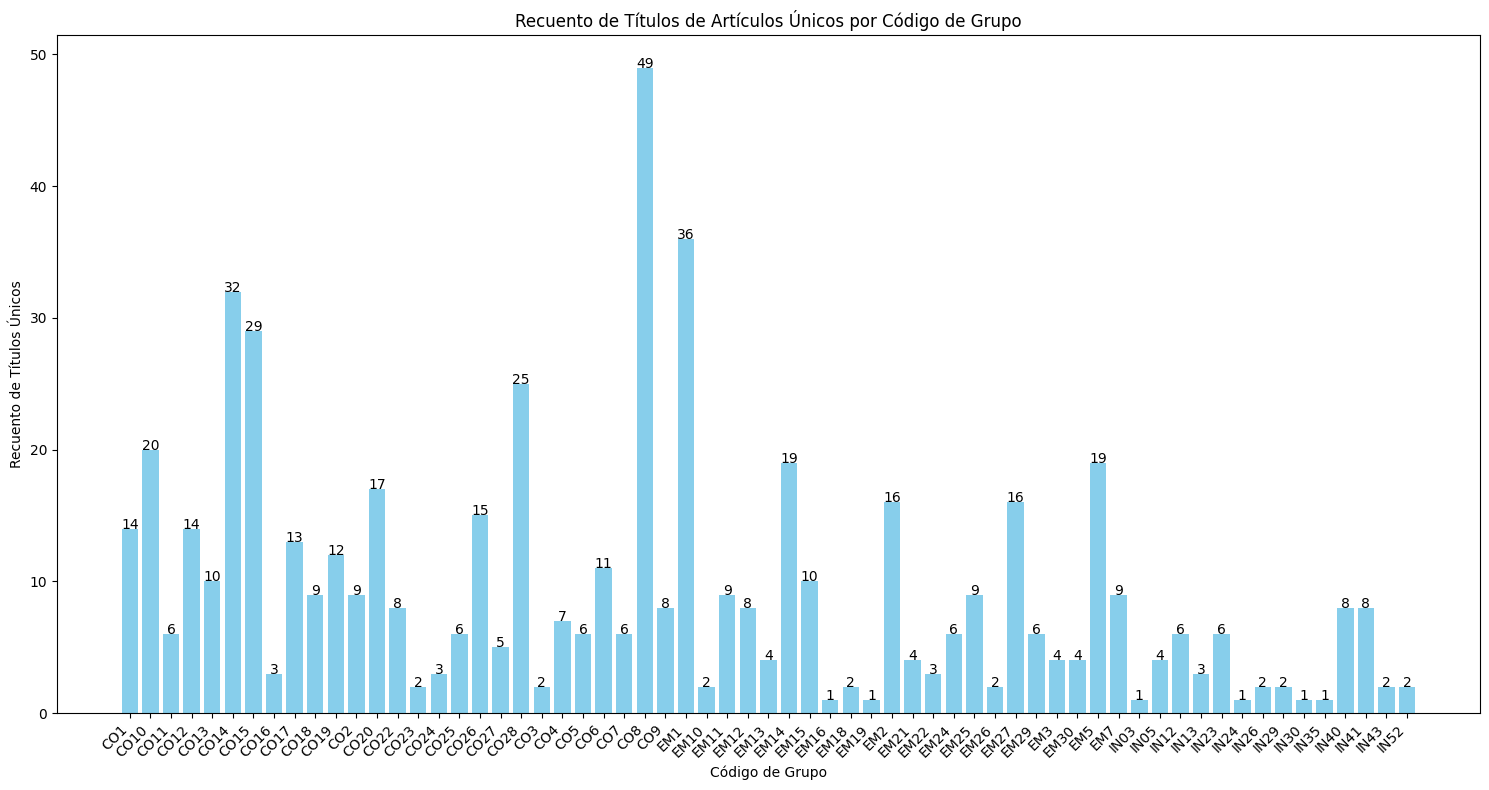

In [ ]:

# Crear un gráfico de barras
plt.figure(figsize=(15, 8))  # Puedes ajustar el tamaño según tus necesidades
plt.bar(df_grupos_publicaciones_ordenado['Código Grupo'], df_grupos_publicaciones_ordenado['Recuento de Títulos Únicos'], color='skyblue')

# Añadir título y etiquetas a los ejes
plt.title('Recuento de Títulos de Artículos Únicos por Código de Grupo')
plt.xlabel('Código de Grupo')
plt.ylabel('Recuento de Títulos Únicos')

# Mejorar las etiquetas del eje x para que sean legibles si hay muchas barras
plt.xticks(rotation=45, ha='right')

# Opcionalmente, puedes añadir el valor del recuento encima de cada barra
for index, value in enumerate(df_grupos_publicaciones_ordenado['Recuento de Títulos Únicos']):
    plt.text(index, value, str(value), ha='center')

# Mostrar el gráfico
plt.tight_layout()  # Ajusta la configuración del gráfico para que todo encaje bien
plt.show()


In [ ]:
#@title Filtrar el DataFrame para incluir solo filas donde 'Código Grupo' es xxx
df_grupo_especifico = df_fusionado_final[df_fusionado_final['Código Grupo'] == 'CO1']

# Mostrar las primeras filas del DataFrame filtrado para verificar
display(df_grupo_especifico)

,Article Title,Autores,DOI,Código Grupo,Coincidencias,Journal name,Autores_coemas,DOI_coemas,Código Grupo_coemas,2022 JIF,Group Authors,Coincidencias_coemas,_merge
102,Metal Homeostasis and Exposure in Distinct Phe...,"lechuga-sancho,am",10.3390/nu15102347,CO1,Coincide,Nutrients,"LECHUGA SANCHO,ALFONSO MARIA",10.3390/nu15102347,CO1,5.9,NaN,Coincide,both
103,Metal Homeostasis and Exposure in Distinct Phe...,"lechuga-sancho,am",10.3390/nu15102347,CO1,Coincide,Nutrients,"González Domínguez,Raúl; Domínguez Riscart,Jes...",10.3390/nu15102347,CO28,5.9,NaN,Coincide,both
161,Sexually dimorphic metal alterations in childh...,"lechuga-sancho,am",10.1002/biof.1948,CO1,Coincide,BioFactors,"LECHUGA SANCHO,ALFONSO MARIA",10.1002/biof.1948,CO1,NaN,NaN,Coincide,both
162,Sexually dimorphic metal alterations in childh...,"lechuga-sancho,am",10.1002/biof.1948,CO1,Coincide,Biofactors,"González Domínguez,Raúl; Domínguez Riscart,Jes...",10.1002/biof.1948,CO28,NaN,NaN,Coincide,both
171,Trace elements as potential modulators of pube...,"lechuga-sancho,am",10.1002/biof.1946,CO1,Coincide,BioFactors,"LECHUGA SANCHO,ALFONSO MARIA",10.1002/biof.1946,CO1,NaN,NaN,Coincide,both
172,Trace elements as potential modulators of pube...,"lechuga-sancho,am",10.1002/biof.1946,CO1,Coincide,BioFactors,"MATEOS BERNAL,ROSA MARIA",10.1002/biof.1946,CO25,NaN,NaN,Coincide,both
173,Trace elements as potential modulators of pube...,"lechuga-sancho,am",10.1002/biof.1946,CO1,Coincide,Biofactors,"González Domínguez,Raúl; Domínguez Riscart,Jes...",10.1002/biof.1946,CO28,NaN,NaN,Coincide,both
283,Exploring the association between circulating ...,"lechuga-sancho,am",10.3389/fpubh.2022.1016819,CO1,Coincide,Frontiers in Public Health,"LECHUGA SANCHO,ALFONSO MARIA",10.3389/fpubh.2022.1016819,CO1,5.2,NaN,Coincide,both
284,Exploring the association between circulating ...,"lechuga-sancho,am",10.3389/fpubh.2022.1016819,CO1,Coincide,Front Public Health,"González Domínguez,Raúl; Domínguez Riscart,Jes...",10.3389/fpubh.2022.1016819,CO28,NaN,NaN,Coincide,both
365,Altered insulin secretion dynamics relate to o...,"ruiz-ocana,p",10.1186/s12967-023-04337-7,CO1,Coincide,Journal of Translational Medicine,"LECHUGA SANCHO,ALFONSO MARIA; RUIZ OCAÑA,PABLO",10.1186/s12967-023-04337-7,CO1,7.4,NaN,Coincide,both


In [ ]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')


# lista de grupos de investigación

grupos_de_investigacion = [
    'CO1', 'CO2', 'CO3', 'CO4', 'CO5', 'CO6', 'CO7', 'CO8', 'CO9', 'CO10',
    'CO11', 'CO12', 'CO13', 'CO14', 'CO15', 'CO16', 'CO17', 'CO18', 'CO19',
    'CO20', 'CO23', 'CO24', 'CO25', 'CO26', 'CO27', 'CO28',
    'IN01', 'IN04', 'IN12', 'IN17', 'IN23', 'IN26', 'IN28', 'IN29', 'IN30',
    'IN34', 'IN35', 'IN40','IN42', 'IN52',
    'EM1', 'EM2', 'EM3', 'EM4', 'EM5', 'EM6', 'EM7', 'EM10', 'EM11', 'EM12',
    'EM13', 'EM14', 'EM15', 'EM16', 'EM18', 'EM19', 'EM20', 'EM21', 'EM22',
    'EM23', 'EM24', 'EM25', 'EM26', 'EM27', 'EM29', 'EM30', 'EM31', 'EM32'
]

# Eliminar los duplicados de la columna 'DOI'
df_fusionado = df_fusionado.drop_duplicates(subset=['DOI'])

# crear un diccionario llamado resultados_por_grupo para almacenar los DataFrames filtrados y sin duplicados de cada grupo.
resultados_por_grupo_fusionado = {}

for grupo in grupos_de_investigacion:
    # Filtrar el DataFrame para incluir solo filas donde 'Código Grupo' coincide con el grupo actual
    df_grupo_fusionado = df_fusionado_final[df_fusionado_final['Código Grupo'] == grupo]

    # Eliminar los duplicados basándose en 'Article Title' para obtener solo los artículos únicos
    df_grupo_unicos_fusionado= df_grupo_fusionado.drop_duplicates(subset=['Article Title'])

    # Guardar el DataFrame filtrado y sin duplicados en el diccionario
    resultados_por_grupo_fusionado[grupo] = df_grupo_unicos_fusionado

    # Exportar el DataFrame a un archivo Excel
    archivo_excel = f'/content/drive/MyDrive/Publicaciones_2023/Publicaciones/{grupo}_resultadosfusionado.xlsx'
    df_grupo_unicos_fusionado.to_excel(archivo_excel, index=False)

# # Escribir cada DataFrame en un archivo Excel individual
# for grupo, df_grupo_fusionado in resultados_por_grupo_fusionado.items():
#     df_grupo_fusionado.to_excel(f'{grupo}_resultados_fusionado.xlsx', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### replicar el codigo para los no coincidentes

In [ ]:
# Seleccionar las columnas específicas de publicaciones__grupos
publicaciones__grupos_filtrar = publicaciones__grupos_filtrar[['Article Title', 'Autores', 'DOI', 'Código Grupo', 'Coincidencias']]

# # Eliminar la columna 'Group Authors' de df coemas
# publicaciones__grupos_coemas_2_filtrar = publicaciones__grupos_coemas_2_filtrar.drop(columns=['Group Authors'])


In [ ]:
# Convertir la columna 'Código Grupo' a mayúsculas
publicaciones__grupos_filtrar['Código Grupo'] = publicaciones__grupos_filtrar['Código Grupo'].str.upper()


In [ ]:
import pandas as pd

# Fusionar para las coincidencias en el título del artículo
df_coincidentes = pd.merge(publicaciones__grupos_filtrar, publicaciones__grupos_coemas_2_filtrar, on='Article Title', how='inner', suffixes=('', '_coemas'))

# Fusionar para las filas del primer DataFrame que no tienen coincidencias
df_no_coincidentes_1 = publicaciones__grupos_filtrar[~publicaciones__grupos_filtrar['Article Title'].isin(publicaciones__grupos_coemas_2_filtrar['Article Title'])]

# Fusionar para las filas del segundo DataFrame que no tienen coincidencias
df_no_coincidentes_2 = publicaciones__grupos_coemas_2_filtrar[~publicaciones__grupos_coemas_2_filtrar['Article Title'].isin(publicaciones__grupos_filtrar['Article Title'])]

# Concatenar los resultados
df_fusionado_no_coincidentes = pd.concat([df_coincidentes, df_no_coincidentes_1, df_no_coincidentes_2], ignore_index=True)

# Ahora df_fusionado contiene la información de ambos DataFrames, incluyendo todas las filas independientemente de si hay coincidencias en el título del artículo o no.

# Ahora df_fusionado contiene la información de ambos DataFrames, donde la información de publicaciones__grupos_coemas_2 se incluye si no coincide en 'Article Title'


In [ ]:

#@title Buscar publicaciones por DOI específico y mostrar resultados
doi_buscar = '10.1007/S12630-023-02486-3' # Inserta el DOI que deseas buscar aquí
publicacion_encontrada = df_fusionado_no_coincidentes[df_fusionado_no_coincidentes['DOI'] == doi_buscar]
print(publicacion_encontrada)


Empty DataFrame
Columns: [Article Title, Autores, DOI, Código Grupo, Coincidencias, Journal name, Autores_coemas, DOI_coemas, Código Grupo_coemas, 2022 JIF, Group Authors, Coincidencias_coemas]
Index: []


In [ ]:
# Exportar el DataFrame a un archivo Excel
archivo_excel = f'/content/drive/MyDrive/Publicaciones_2023/Publicaciones_no_coincidentes/df_fusionado_no_coincidentes.xlsx'

df_fusionado_no_coincidentes.to_excel(archivo_excel, index=False)


In [ ]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')


# lista de grupos de investigación

grupos_de_investigacion = [
    'CO1', 'CO2', 'CO3', 'CO4', 'CO5', 'CO6', 'CO7', 'CO8', 'CO9', 'CO10',
    'CO11', 'CO12', 'CO13', 'CO14', 'CO15', 'CO16', 'CO17', 'CO18', 'CO19',
    'CO20', 'CO23', 'CO24', 'CO25', 'CO26', 'CO27', 'CO28',
    'IN01', 'IN04', 'IN12', 'IN17', 'IN23', 'IN26', 'IN28', 'IN29', 'IN30',
    'IN34', 'IN35', 'IN40','IN42', 'IN52',
    'EM1', 'EM2', 'EM3', 'EM4', 'EM5', 'EM6', 'EM7', 'EM10', 'EM11', 'EM12',
    'EM13', 'EM14', 'EM15', 'EM16', 'EM18', 'EM19', 'EM20', 'EM21', 'EM22',
    'EM23', 'EM24', 'EM25', 'EM26', 'EM27', 'EM29', 'EM30', 'EM31', 'EM32'
]
# Eliminar los duplicados de la columna 'DOI'
df_fusionado_no_coincidentes = df_fusionado_no_coincidentes.drop_duplicates(subset=['DOI'])

# crear un diccionario llamado resultados_por_grupo para almacenar los DataFrames filtrados y sin duplicados de cada grupo.
resultados_por_grupo_fusionado_no_coincidentes = {}

for grupo in grupos_de_investigacion:
    # Filtrar el DataFrame para incluir solo filas donde 'Código Grupo' coincide con el grupo actual
    df_grupo_fusionado_no_coincidentes = df_fusionado_no_coincidentes[df_fusionado_no_coincidentes['Código Grupo'] == grupo]

    # Eliminar los duplicados basándose en 'Article Title' para obtener solo los artículos únicos
    df_grupo_unicos_fusionado_no_coincidentes= df_grupo_fusionado_no_coincidentes.drop_duplicates(subset=['Article Title'])

    # Guardar el DataFrame filtrado y sin duplicados en el diccionario
    resultados_por_grupo_fusionado_no_coincidentes[grupo] = df_grupo_unicos_fusionado_no_coincidentes

    # Exportar el DataFrame a un archivo Excel
    archivo_excel = f'/content/drive/MyDrive/Publicaciones_2023/Publicaciones_no_coincidentes/{grupo}_resultadosfusionadonocoincidentes.xlsx'
    df_grupo_unicos_fusionado_no_coincidentes.to_excel(archivo_excel, index=False)

# # Escribir cada DataFrame en un archivo Excel individual
# for grupo, df_grupo_fusionado in resultados_por_grupo_fusionado.items():
#     df_grupo_fusionado.to_excel(f'{grupo}_resultados_fusionado.xlsx', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# lista de grupos de investigación

grupos_de_investigacion = [
    'CO1', 'CO2', 'CO3', 'CO4', 'CO5', 'CO6', 'CO7', 'CO8', 'CO9', 'CO10',
    'CO11', 'CO12', 'CO13', 'CO14', 'CO15', 'CO16', 'CO17', 'CO18', 'CO19',
    'CO20', 'CO23', 'CO24', 'CO25', 'CO26', 'CO27', 'CO28',
    'IN01', 'IN04', 'IN12', 'IN17', 'IN23', 'IN26', 'IN28', 'IN29', 'IN30',
    'IN34', 'IN35', 'IN40','IN42', 'IN52',
    'EM1', 'EM2', 'EM3', 'EM4', 'EM5', 'EM6', 'EM7', 'EM10', 'EM11', 'EM12',
    'EM13', 'EM14', 'EM15', 'EM16', 'EM18', 'EM19', 'EM20', 'EM21', 'EM22',
    'EM23', 'EM24', 'EM25', 'EM26', 'EM27', 'EM29', 'EM30', 'EM31', 'EM32'
]


# crear un diccionario llamado resultados_por_grupo para almacenar los DataFrames filtrados y sin duplicados de cada grupo.
resultados_por_grupo = {}

for grupo in grupos_de_investigacion:
    # Filtrar el DataFrame para incluir solo filas donde 'Código Grupo' coincide con el grupo actual
    df_grupo = publicaciones__grupos[publicaciones__grupos['Código Grupo'] == grupo]

    # Eliminar los duplicados basándose en 'Article Title' para obtener solo los artículos únicos
    df_grupo_unicos = df_grupo.drop_duplicates(subset=['Article Title'])

    # Guardar el DataFrame filtrado y sin duplicados en el diccionario
    resultados_por_grupo[grupo] = df_grupo_unicos

# Escribir cada DataFrame en un archivo Excel individual
for grupo, df_grupo in resultados_por_grupo.items():
    df_grupo.to_excel(f'{grupo}_resultados.xlsx', index=False)


In [ ]:

# lista de grupos de investigación

grupos_de_investigacion = [
    'CO1', 'CO2', 'CO3', 'CO4', 'CO5', 'CO6', 'CO7', 'CO8', 'CO9', 'CO10',
    'CO11', 'CO12', 'CO13', 'CO14', 'CO15', 'CO16', 'CO17', 'CO18', 'CO19',
    'CO20', 'CO23', 'CO24', 'CO25', 'CO26', 'CO27', 'CO28',
    'IN01', 'IN04', 'IN12', 'IN17', 'IN23', 'IN26', 'IN28', 'IN29', 'IN30',
    'IN34', 'IN35', 'IN40','IN42', 'IN52',
    'EM1', 'EM2', 'EM3', 'EM4', 'EM5', 'EM6', 'EM7', 'EM10', 'EM11', 'EM12',
    'EM13', 'EM14', 'EM15', 'EM16', 'EM18', 'EM19', 'EM20', 'EM21', 'EM22',
    'EM23', 'EM24', 'EM25', 'EM26', 'EM27', 'EM29', 'EM30', 'EM31', 'EM32'
]


# crear un diccionario llamado resultados_por_grupo para almacenar los DataFrames filtrados y sin duplicados de cada grupo.
resultados_por_grupo_coemas = {}

for grupo in grupos_de_investigacion:
    # Filtrar el DataFrame para incluir solo filas donde 'Código Grupo' coincide con el grupo actual
    df_grupo_coemas = publicaciones__grupos_coemas_2[publicaciones__grupos_coemas_2['Código Grupo'] == grupo]

    # Eliminar los duplicados basándose en 'Article Title' para obtener solo los artículos únicos
    df_grupo_unicos_coemas = df_grupo_coemas.drop_duplicates(subset=['Article Title'])

    # Guardar el DataFrame filtrado y sin duplicados en el diccionario
    resultados_por_grupo_coemas[grupo] = df_grupo_unicos_coemas

# Escribir cada DataFrame en un archivo Excel individual
for grupo, df_grupo_coemas in resultados_por_grupo_coemas.items():
    df_grupo_coemas.to_excel(f'{grupo}_resultados_coemas.xlsx', index=False)